In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [43]:
string = "000010010000001000000001100000000100:530CQI9e4560a7c1266d8CQIb5fCQI8dCQIa328c3ecfCQId91b763eb0dCQIaa4d2424c1fCQId7fd31f3134806b9695e309dCQIced13cf9a43549fa2183742e7c63"

# Find the position of ":"
colon_position = string.index(":")

# Count the number of characters before ":"
character_count = colon_position

print(f"Number of characters before ':' is {character_count}.")
dimension = int(math.sqrt(character_count))
print("The dimension of the permutation matrix is : ", dimension, " x ", dimension)

# Get the matrix of permutation
permutation_string = string.split(":")[0]
permutation_matrix = np.array(list(map(int, permutation_string)))

permutation_string = string.split(":")[0]
permutation_matrix = np.array(list(map(int, permutation_string)))
permutation_matrix = permutation_matrix.reshape(dimension, dimension)
inverse_transpose_perm_matrix = np.linalg.inv(permutation_matrix).T

print("Inverse of the transpostition permutation matrix is :")
print(inverse_transpose_perm_matrix)

# Get encoding string
base17_code_str= string[colon_position + 1:]
base17_code_str = base17_code_str.replace("CQI", 'g')

print("Encoding :", base17_code_str)

Number of characters before ':' is 36.
The dimension of the permutation matrix is :  6  x  6
Inverse of the transpostition permutation matrix is :
[[0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
Encoding : 530g9e4560a7c1266d8gb5fg8dga328c3ecfgd91b763eb0dgaa4d2424c1fgd7fd31f3134806b9695e309dgced13cf9a43549fa2183742e7c63


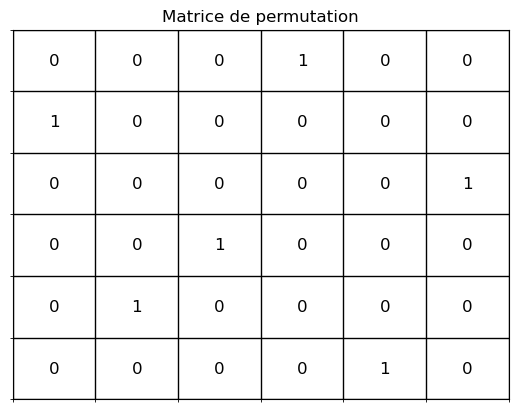

In [44]:
# Ressources : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks

#Show initial permutation matrix
fig, ax = plt.subplots()

# show number in grid
for i in range(len(permutation_matrix)):
    for j in range(len(permutation_matrix)):
        ax.text(j, i, str(permutation_matrix[i, j]),
                ha='center', va='center', fontsize=12)

# Add line to grid
ax.set_xticks(np.arange(-0.5, len(permutation_matrix), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(permutation_matrix), 1), minor=True)
ax.grid(which='minor', linestyle='-', linewidth=1, color='black')

# Hide axis titles
ax.set_xticks([])
ax.set_yticks([])

plt.title("Matrice de permutation")
plt.show()

In [45]:
# Convert base-17 to decimal
decimal_number = int(base17_code_str, 17)

# Convert decimal to binary
binary_string = bin(decimal_number)[2:]

print("The result of convert base 17 to bin is : ", binary_string)

The result of convert base 17 to bin is :  100110001110000000001001001000010010100001011000111001101110000010001011110001100110100000011010001111010001000000001001100110010011000110001010000001011001000100001001010100111011000110001000011000010011001100011010101010011011001100011011111010111011101101011000011000010111100100001010001000010010000110011000101010010111000110101010100000110111000110001011110000111001000000101000100000110011101100001010101101011011000110101010101000011011100110000000001000010


In [46]:
 # Transform binary string to matrix
grouped_characters = [binary_string[i:i+dimension] for i in range(0, len(binary_string), dimension)]
matrix_list = [list(map(int, group)) for group in grouped_characters]

last_elem = grouped_characters[len(grouped_characters)-1]  # Corrected line
last_elem += '2' * (dimension - len(last_elem))  # Add the last 0s
matrix_list[-1] = list(map(int, last_elem))  # Update the last element in matrix_list

binrary_matrix = np.array(matrix_list)
print(binrary_matrix)

[[1 0 0 1 1 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 0 0]
 [0 1 0 0 1 0]
 [1 0 0 0 0 1]
 [0 1 1 0 0 0]
 [1 1 1 0 0 1]
 [1 0 1 1 1 0]
 [0 0 0 0 1 0]
 [0 0 1 0 1 1]
 [1 1 0 0 0 1]
 [1 0 0 1 1 0]
 [1 0 0 0 0 0]
 [0 1 1 0 1 0]
 [0 0 1 1 1 1]
 [0 1 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 1 0 0 1]
 [1 0 0 1 1 0]
 [0 1 0 0 1 1]
 [0 0 0 1 1 0]
 [0 0 1 0 1 0]
 [0 0 0 0 0 1]
 [0 1 1 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 1]
 [0 1 0 1 0 0]
 [1 1 1 0 1 1]
 [0 0 0 1 1 0]
 [0 0 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 1 1]
 [0 0 1 1 0 0]
 [0 1 1 0 1 0]
 [1 0 1 0 1 0]
 [0 1 1 0 1 1]
 [0 0 1 1 0 0]
 [0 1 1 0 1 1]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 0 1 1 0 1]
 [0 1 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 1 1 1]
 [1 0 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 0]
 [0 1 0 0 1 0]
 [0 0 0 1 1 0]
 [0 1 1 0 0 0]
 [1 0 1 0 1 0]
 [0 1 0 1 1 1]
 [0 0 0 1 1 0]
 [1 0 1 0 1 0]
 [1 0 0 0 0 0]
 [1 1 0 1 1 1]
 [0 0 0 1 1 0]
 [0 0 1 0 1 1]
 [1 1 0 0 0 0]
 [1 1 1 0 0 1]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 0 1 1]
 [1 0 1 1 

In [50]:
binrary_before_perm_matrix = np.matmul(binrary_matrix, inverse_transpose_perm_matrix)
flatten = binrary_before_perm_matrix.flatten().astype(int)
filtered_array = flatten[flatten != 2]

print(filtered_array)


[1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [51]:
binrary_before_perm_string = ''.join(map(str, filtered_array.flatten().astype(int)))
ascii_string = ''.join([chr(int(binrary_before_perm_string[i:i+8], 2)) for i in range(0, len(binrary_before_perm_string), 8)])

print("ASCII String:")
print(ascii_string)

ASCII String:
#z¸,Z0¸µ@HhÀLGèHcBx«Â|ëãØcPèX«XjxlIà
bè?Èj+ÈÀ" 
